# Chapter 3.2: LA County's Estimated Infections and Rate of Detection

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    df = pd.read_csv('https://lacdph.shinyapps.io/covid19_surveillance_dashboard/_w_355748cc/session/7b519430b33e061672e690e7aa06a2c1/download/download3?w=355748cc')
    df.to_csv('LA_Backup.csv', index = False)
except:
    df = pd.read_csv('LA_Backup.csv', index_col = False )
    print("Using LA backup file.")

Using LA backup file.


In [3]:
index_val = len(df.index) 
df = df.sort_index(ascending=False, axis=0)
df = df.reset_index()

In [4]:
for ind in df.index:
    if (int(ind)+18) > index_val-1:
        df.loc[ind, 'total_infections'] = 0
    else:
        df.loc[ind, 'total_infections'] = df.loc[ind+18, 'total_deaths'] * 100

In [5]:
df = df[0:-18]

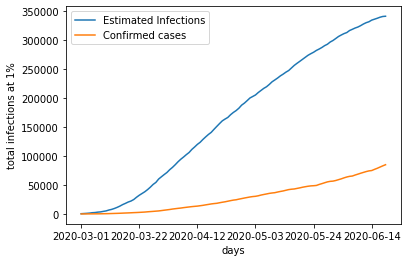

In [6]:
fig, ax = plt.subplots()
ax.plot(df['date_use'], df['total_infections'], label='Estimated Infections')
ax.plot(df['date_use'], df['total_cases'], label='Confirmed cases')
ax.set_xlabel('days')
ax.set_ylabel('total infections at 1%')
plt.xticks(np.arange(0, 110, step=21)) 
ax.legend()

This graph displays LA's estimated number of infections, calculated with death counts and a death rate 0f 1%, and the number of confirmed cases of COVID 19.  

In [7]:
df = df[15:-1]
df['detection_rate'] = df['total_cases'] / df['total_infections']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118e0c7d0>]],
      dtype=object)

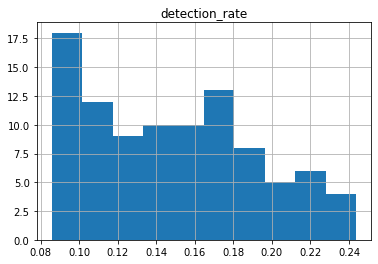

In [8]:
df.hist(column='detection_rate', bins=10)

To determine the average detection rate in LA county, the number of reported cases is divided by it’s estimated counterpart for each date. As displayed in the histogram, LA appears to detect approximately 10-20% of all COVID 19 cases. 

In [9]:
df['detection_cases'] = df['total_cases'] / 0.2

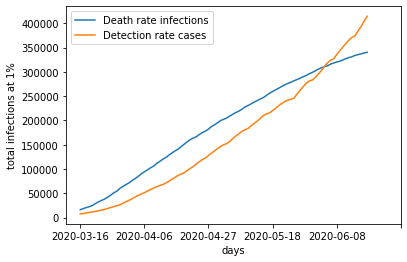

In [10]:
fig, ax2 = plt.subplots()
ax2.plot(df['date_use'], df['total_infections'], label='Death rate infections')
ax2.plot(df['date_use'], df['detection_cases'], label='Detection rate cases')
ax2.set_xlabel('days')
ax2.set_ylabel('total infections at 1%')
plt.xticks(np.arange(0, 110, step=21)) 
ax2.legend()

    LA’s detection rate ranges from approximately 10-20%. Applying these detection rates to confirmed cases would produce another infection estimate, but this metric would incorporate a variable not directly produced by death counts. By cross validating a detection-rate based infection-estimate with the death-rate based infection-estimate, the validity of both estimation methods can be evaluated. In this graph I chose a conservative 20% detection rate, and divided confirmed cases by that decimal aproximation. To cross validate for accuracy, the detection rate cases are compared to the original infection estimation based on a 1% death rate and reported deaths. 